In [3]:
import rioxarray  # Import the rioxarray library for reading and writing geospatial raster data
from pathlib import Path
import matplotlib.pyplot as plt  # Import the matplotlib library for plotting
from pathlib import Path
from create_comparison import create_comparison_figure

# Load the DEM file
dem_path = Path(r"D:\NFETRA\Mixte\DetachmentLavinerSystem\export\DEM.tif")  # Define the path to the DEM (Digital Elevation Model) file
dem = rioxarray.open_rasterio(dem_path, masked=True)  # Open the DEM file using rioxarray and set the no data value to -32767
marker_path = Path(r"D:\NFETRA\Mixte\DetachmentLavinerSystem\export\QC\markers.shp")

swiss_dem_path = Path(r"D:\NFETRA\Projet QGIS\DATA\swiss_topo_files\DEM_swisstopo\DEM_Laviner_swisstopo.tif")
swiss_dem = rioxarray.open_rasterio(swiss_dem_path, masked=True)   # Open the DEM file using rio"array


c:\Users\leila\miniconda3\envs\leila\Lib\site-packages\pyproj\crs\_cf1x8.py:515: UserWarning: angle from rectified to skew grid parameter lost in conversion to CF
  warnings.warn(


c:\Users\leila\miniconda3\envs\leila\Lib\site-packages\pyproj\crs\_cf1x8.py:515: UserWarning: angle from rectified to skew grid parameter lost in conversion to CF
  warnings.warn(
c:\Users\leila\miniconda3\envs\leila\Lib\site-packages\pyproj\crs\_cf1x8.py:515: UserWarning: angle from rectified to skew grid parameter lost in conversion to CF
  warnings.warn(
c:\Users\leila\git\rasters\create_comparison.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), rotation=90, va='center')
c:\Users\leila\git\rasters\create_comparison.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')
c:\Users\leila\git\rasters\create_comparison.py:96: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been display

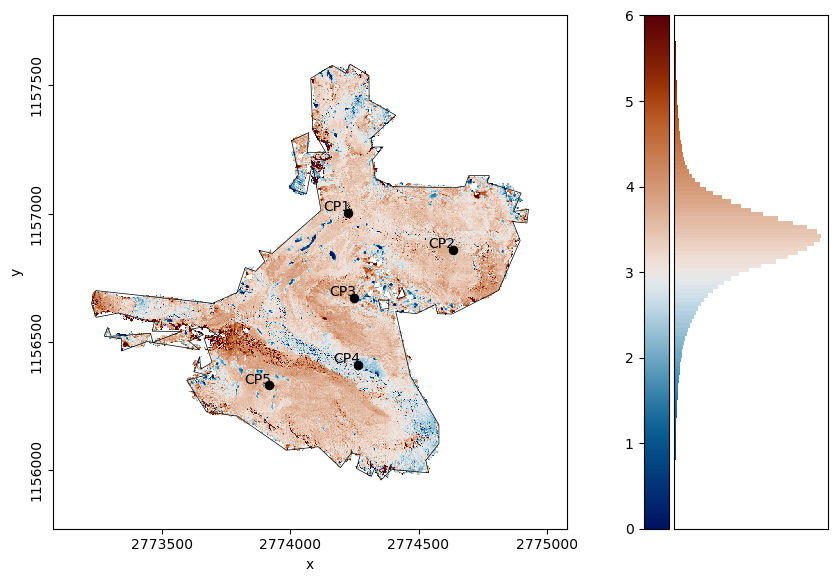

In [5]:
create_comparison_figure(dem_path, swiss_dem_path, marker_path, vmin=-0, vmax=6, crop_size=2000, xtickdelta=1000, ytickdelta=1000)

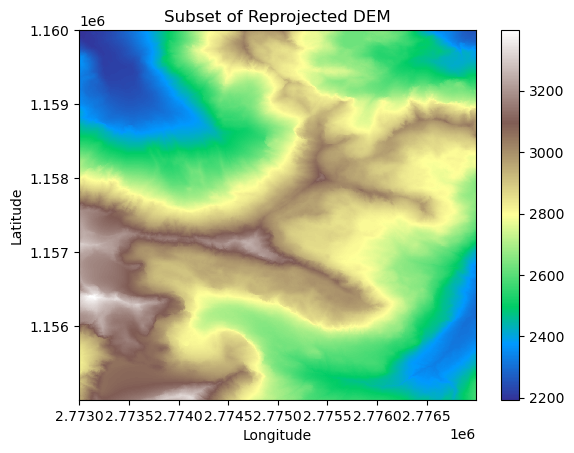

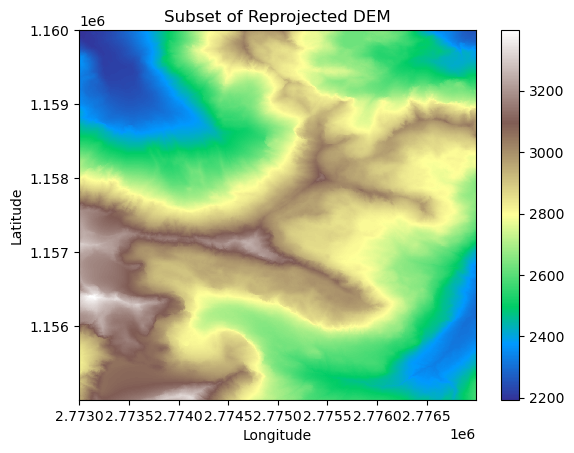

In [2]:


# Plot a subset of the reprojected DEM
subset_swiss_dem_reprojected = swiss_dem.isel(x=slice(0, 30000, 10), y=slice(0, 30000, 10))
# Select a subset of the swiss_dem data array by slicing the x and y coordinates from 0 to 30000 with a step of 10

subset_swiss_dem_reprojected.plot(cmap='terrain')
# Plot the selected subset using a terrain colormap

plt.title('Subset of Reprojected DEM')
# Set the title of the plot

plt.xlabel('Longitude')
# Set the label for the x-axis

plt.ylabel('Latitude')
# Set the label for the y-axis

plt.show()
# Display the plot
subset_swiss_dem_reprojected = swiss_dem.isel(x=slice(0, 30000, 10), y=slice(0, 30000, 10))
subset_swiss_dem_reprojected.plot(cmap='terrain')
plt.title('Subset of Reprojected DEM')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [3]:
# Reproject dem to match swiss_dem
dem_reprojected = dem.rio.reproject_match(swiss_dem)
dem_reprojected

dem_reprojected = dem_reprojected.assign_coords({
    "x": swiss_dem.x,
    "y": swiss_dem.y,
})

c:\Users\leila\miniconda3\envs\raster\Lib\site-packages\pyproj\crs\_cf1x8.py:515: UserWarning: angle from rectified to skew grid parameter lost in conversion to CF
  warnings.warn(


In [4]:
# Reproject dem to match swiss_dem
dem_reprojected = dem.rio.reproject_match(swiss_dem)  # Reproject the DEM to match the Swiss DEM's coordinate system

# Assign coordinates from swiss_dem to dem_reprojected
dem_reprojected = dem_reprojected.assign_coords({
    "x": swiss_dem.x,  # Assign x coordinates from swiss_dem
    "y": swiss_dem.y,  # Assign y coordinates from swiss_dem
})

c:\Users\leila\miniconda3\envs\raster\Lib\site-packages\pyproj\crs\_cf1x8.py:515: UserWarning: angle from rectified to skew grid parameter lost in conversion to CF
  warnings.warn(


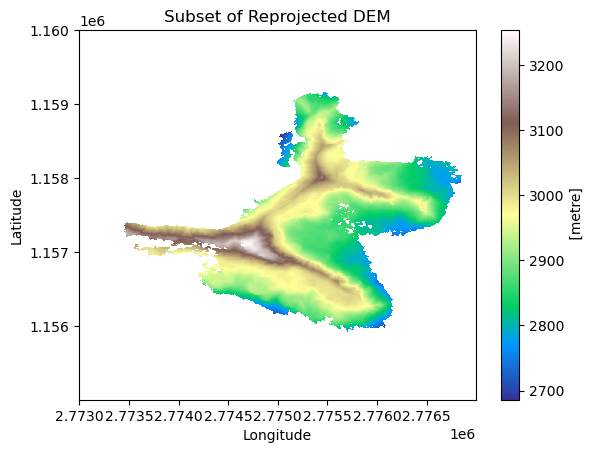

In [8]:
# Plot a subset of the reprojected DEM
subset_dem_reprojected = dem_reprojected.isel(x=slice(0, 30000, 10), y=slice(0, 30000, 10))
subset_dem_reprojected.plot(cmap='terrain')
plt.title('Subset of Reprojected DEM')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [ ]:
# Plot a subset of the reprojected DEM
subset_dem_reprojected = dem_reprojected.isel(x=slice(0, 30000, 10), y=slice(0, 30000, 10))
# Select a subset of the dem_reprojected data array by slicing the x and y coordinates from 0 to 30000 with a step of 10

subset_dem_reprojected.plot(cmap='terrain')
# Plot the selected subset using a terrain colormap

plt.title('Subset of Reprojected DEM')
# Set the title of the plot# Plot a subset of the reprojected DEM
subset_dem_reprojected = dem_reprojected.isel(x=slice(0, 30000, 10), y=slice(0, 30000, 10))
# Select a subset of the dem_reprojected data array by slicing the x and y coordinates from 0 to 30000 with a step of 10

subset_dem_reprojected.plot(cmap='terrain')
# Plot the selected subset using a terrain colormap

plt.title('Subset of Reprojected DEM')

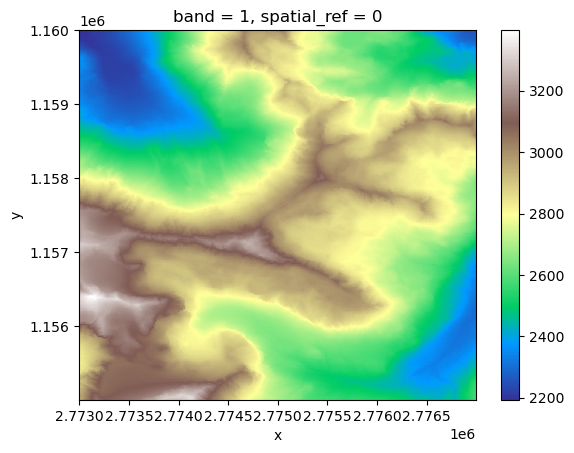

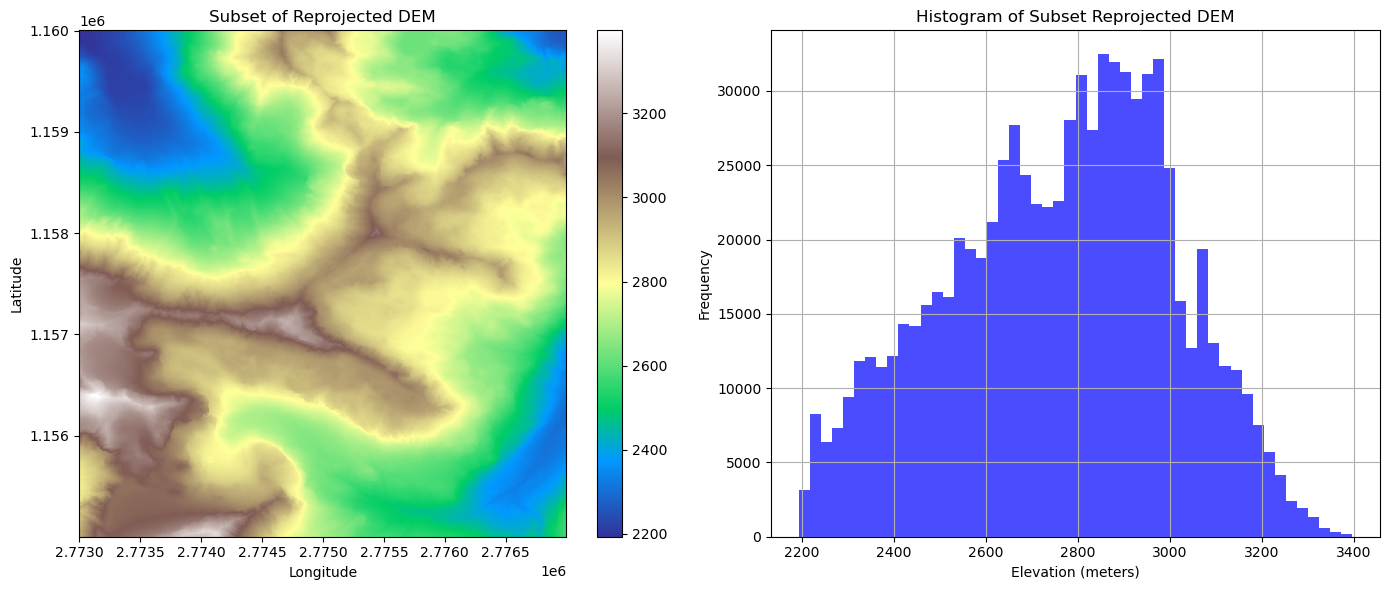

In [22]:
# Plot a subset of the reprojected DEM
subset_swiss_dem_reprojected = swiss_dem.isel(x=slice(0, 30000, 10), y=slice(0, 30000, 10))
subset_swiss_dem_reprojected.plot(cmap='terrain')
#plt.title('Subset of Reprojected DEM')
#plt.xlabel('Longitude')
#plt.ylabel('Latitude')
#plt.show()

# Plot histogram alongside the colorbar axis
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot the subset of the reprojected DEM
subset_swiss_dem_reprojected.plot(ax=ax[0], cmap='terrain')
ax[0].set_title('Subset of Reprojected DEM')
ax[0].set_xlabel('Longitude')
ax[0].set_ylabel('Latitude')

# Plot the histogram
subset_swiss_dem_reprojected.plot.hist(ax=ax[1], bins=50, color='blue', alpha=0.7)
ax[1].set_title('Histogram of Subset Reprojected DEM')
ax[1].set_xlabel('Elevation (meters)')
ax[1].set_ylabel('Frequency')
ax[1].grid(True)

plt.tight_layout()
plt.show()

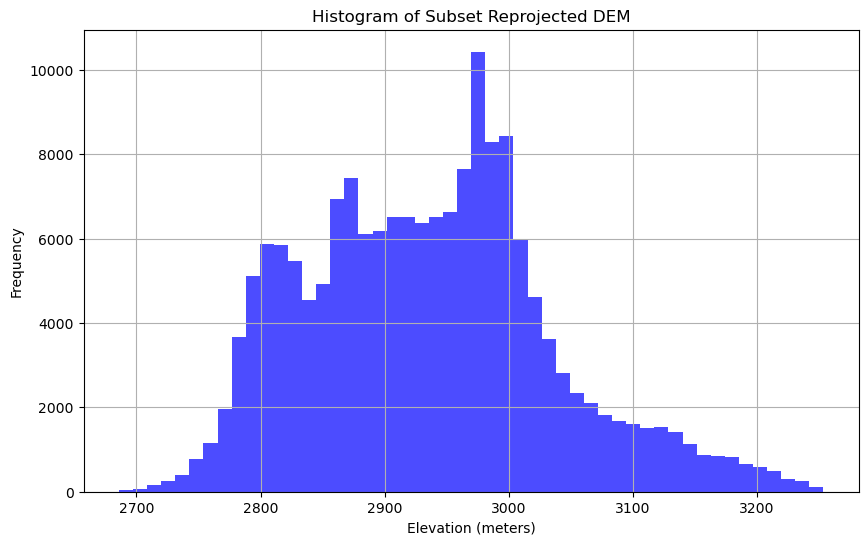

In [10]:
plt.figure(figsize=(10, 6))  # Create a new figure with a specified size
subset_dem_reprojected.plot.hist(bins=50, color='blue', alpha=0.7)  # Plot the histogram of the subset DEM reprojected data
plt.title('Histogram of Subset Reprojected DEM')  # Set the title of the plot
plt.xlabel('Elevation (meters)')  # Set the label for the x-axis
plt.ylabel('Frequency')  # Set the label for the y-axis
plt.grid(True)  # Enable grid for better readability
plt.show()  # Display the plot

In [11]:
# Calculate the difference between the reprojected DEM and swiss_dem
dem_diff = dem_reprojected - swiss_dem


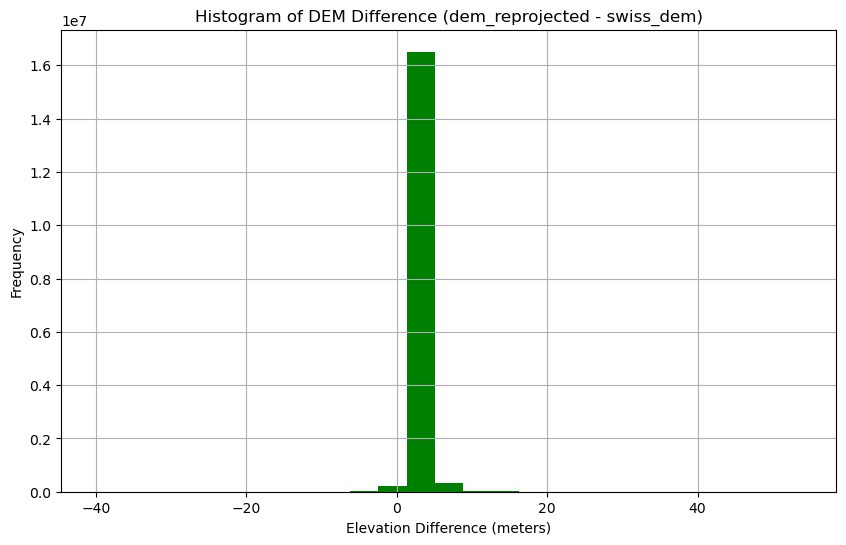

In [12]:
import numpy as np

# Plot the histogram of the difference
plt.figure(figsize=(10, 6))  # Create a new figure with a specified size
# Calculate the number of bins for 10cm intervals
bin_width = 0.1  # 10 cm in meters
bins = np.arange(dem_diff.min(), dem_diff.max() + bin_width, bin_width)
dem_diff.plot.hist(bins=25, color='green')  # Plot the histogram of the DEM difference data
plt.title('Histogram of DEM Difference (dem_reprojected - swiss_dem)')  # Set the title of the plot
plt.xlabel('Elevation Difference (meters)')  # Set the label for the x-axis
plt.ylabel('Frequency')  # Set the label for the y-axis
plt.grid(True)  # Enable grid for better readability
plt.show()  # Display the plot

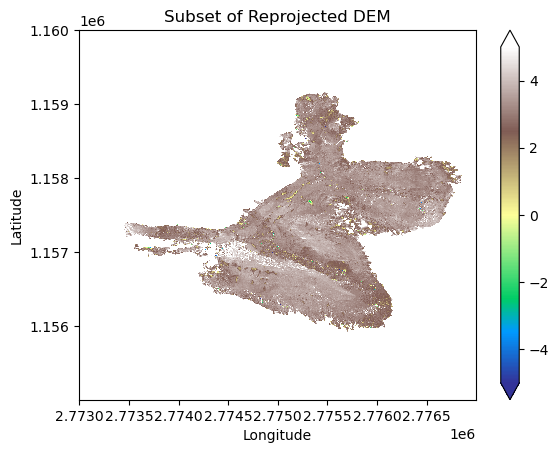

In [16]:
# Plot a subset of the reprojected DEM
subset_dem_diff_reprojected = dem_diff.isel(x=slice(0, 30000, 10), y=slice(0, 30000, 10))
subset_dem_diff_reprojected.plot(cmap='terrain', vmin=-5, vmax=5)
plt.title('Subset of Reprojected DEM')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()